# Cycle Data Visualization

# Refrences

https://github.com/justmarkham/pandas...

http://pandas.pydata.org/pandas-docs/...

http://pandas.pydata.org/pandas-docs/...

https://github.com/meli-lewis/pycaribbean2016

http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

# Libraries used

In [441]:
import os,csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [442]:
df1 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_weather.csv')
# convert 'Time' to datetime format
df1['Date'] = pd.to_datetime(df1.Date)
# set an existing column as the index
df1.set_index('Date', inplace=True)
df1.head()

,Bike_rented,Temp,Humidity,Visibility_Miles,Wind_Speed_MPH,Events_num
Date,,,,,,
2015-01-01,88,1,70,10,0,3
2015-02-01,180,3,76,10,4,3
2015-03-01,104,3,84,7,2,3
2015-04-01,56,8,84,8,7,3
2015-05-01,244,13,81,8,14,3


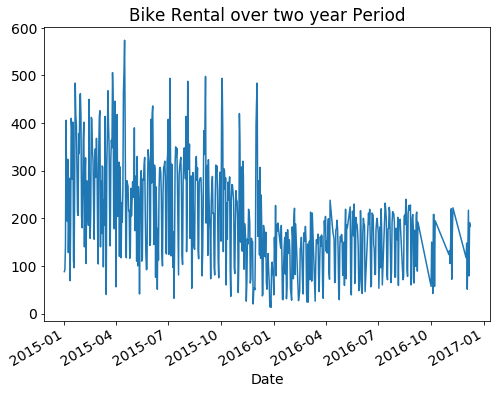

In [443]:
a = df1['Bike_rented'].plot(title='Bike Rental over two year Period')

# Adding up the cyclists by weekday

In [512]:
bikes = df1[['Bike_rented']]

In [513]:
bikes[:5]

,Bike_rented
Date,
2015-01-01,88
2015-02-01,180
2015-03-01,104
2015-04-01,56
2015-05-01,244


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. The index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [514]:
bikes.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='Date', length=609, freq=None)

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [515]:
bikes.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=609)

We actually want the weekday, though:

In [448]:
bikes.index.weekday

Int64Index([3, 6, 6, 2, 4, 0, 2, 5, 1, 3,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='Date', length=609)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [449]:
bikes['weekday'] = bikes.index.weekday
bikes[:5]

,Bike_rented,weekday
Date,,
2015-01-01,88,3
2015-02-01,180,6
2015-03-01,104,6
2015-04-01,56,2
2015-05-01,244,4


This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, if you're familiar with that. I'm not going to explain more about it right now -- if you want to to know more, [the documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html) is really good.

In this case, `bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday".

In [450]:
weekday_counts = bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Bike_rented
weekday,
0,18610
1,19913
2,21075
3,19646
4,18961
5,11833
6,11187


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [451]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Bike_rented
Monday,18610
Tuesday,19913
Wednesday,21075
Thursday,19646
Friday,18961
Saturday,11833
Sunday,11187


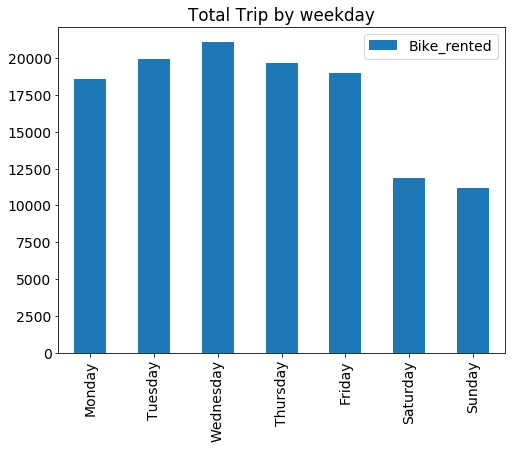

In [452]:
weekday_counts.plot(kind='bar', title='Total Trip by weekday')

# Adding up the cyclists by weekend

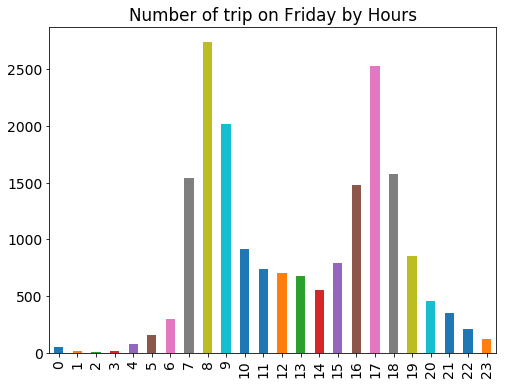

In [545]:
df2 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_clean.csv')
df2 = df2[(df2.Day_num == 1)]
#df2.tail()
# compare with bar plot
j = df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip on Friday by Hours')

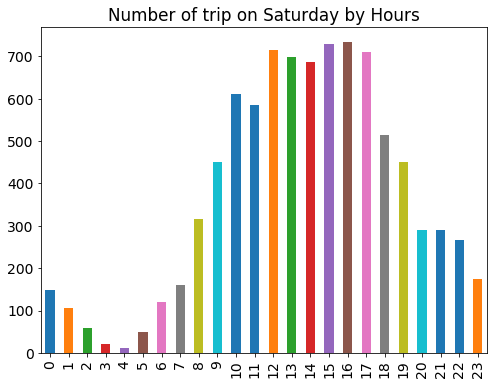

In [544]:
df2 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_clean.csv')
df2 = df2[(df2.Day_num == 2)]
#df2.tail()
# compare with bar plot
p = df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip on Saturday by Hours')

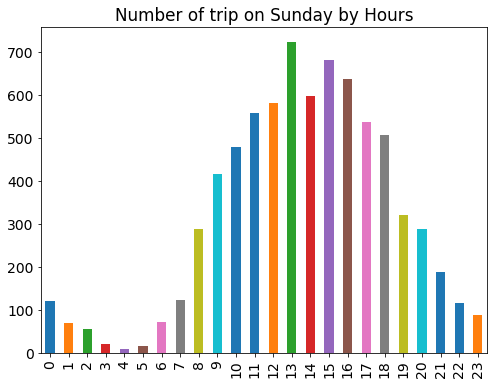

In [543]:
df2 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_clean.csv')
df2 = df2[(df2.Day_num == 3)]
#df2.tail()
# compare with bar plot
l = df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip on Sunday by Hours')

# Adding up the cyclists by Month

In [453]:
df1 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_weather.csv')
# convert 'Time' to datetime format
df1['Date'] = pd.to_datetime(df1.Date)
# set an existing column as the index
df1.set_index('Date', inplace=True)

In [454]:
bikes = df1[['Bike_rented']]
bikes.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='Date', length=609, freq=None)

In [455]:
bikes.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
           dtype='int64', name='Date', length=609)

In [456]:
# Add up the number of cyclists by month, and plot!
bikes['month'] = bikes.index.month
bikes[:5]

,Bike_rented,month
Date,,
2015-01-01,88,1
2015-02-01,180,2
2015-03-01,104,3
2015-04-01,56,4
2015-05-01,244,5


In [457]:
month_counts = bikes.groupby('month').aggregate(sum)
month_counts

,Bike_rented
month,
1,11833
2,10603
3,12558
4,11307
5,10833
6,11413
7,12086
8,12013
9,8503


In [458]:
month_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts

,Bike_rented
Jan,11833
Feb,10603
Mar,12558
Apr,11307
May,10833
Jun,11413
Jul,12086
Aug,12013
Sep,8503
Oct,8034


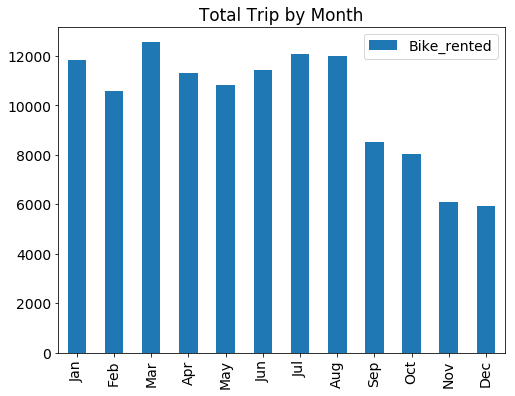

In [459]:
a = month_counts.plot(kind='bar', title='Total Trip by Month')

In [460]:
df1 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_weather.csv')
# convert 'Time' to datetime format
df1['Date'] = pd.to_datetime(df1.Date)
# set an existing column as the index
df1.set_index('Date', inplace=True)
bikes = df1[['Bike_rented']]
bikes.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='Date', length=609, freq=None)

In [461]:
# Add up the number of cyclists by weekday, and plot!
bikes['weekday'] = bikes.index.weekday
# Add up the number of cyclists by month, and plot!
bikes['month'] = bikes.index.month

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227544E9D68>,
      dtype=object)

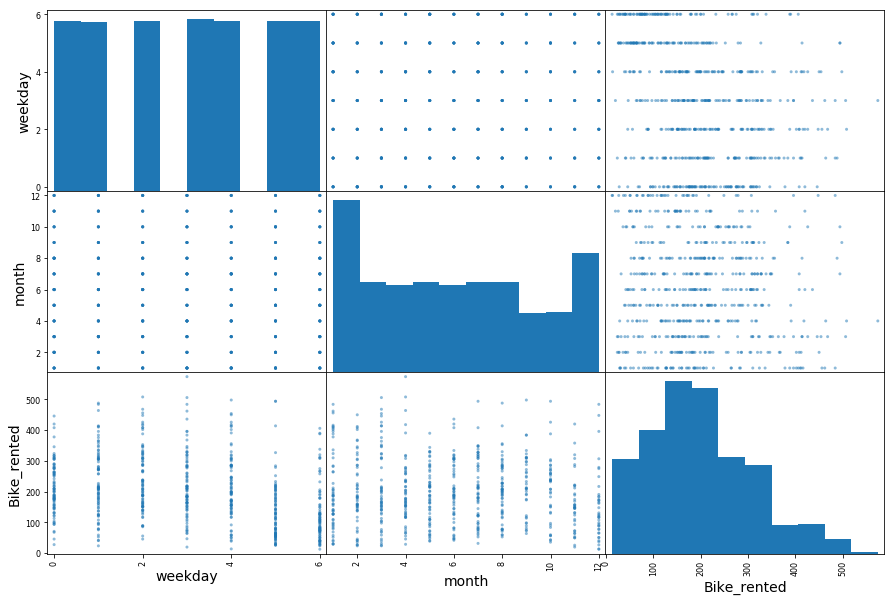

In [462]:
pd.scatter_matrix(bikes[['weekday', 'month', 'Bike_rented']], figsize=(15, 10))

# Number of Trips by Age

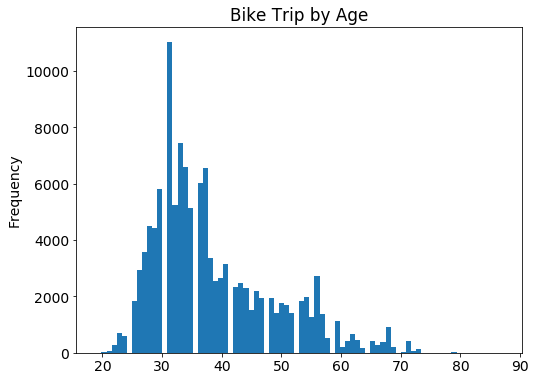

In [463]:
df2 = pd.read_csv('C:/Users/mrferozi/Desktop/GitHub/Bike/dataset/cycle/trip_clean.csv')
# convert 'Time' to datetime format
df2['Date'] = pd.to_datetime(df2.Date)
# set an existing column as the index
df2.set_index('Date', inplace=True)
# Bike Trip by Age
df2.age.plot(kind='hist',title= 'Bike Trip by Age', bins=80)

# Number of Trips by Gender

In [464]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121225 entries, 2015-01-01 to 2016-08-31
Data columns (total 26 columns):
trip_id                 121225 non-null int64
starttime               121225 non-null object
stoptime                121225 non-null object
bikeid                  121225 non-null object
tripduration            121225 non-null float64
from_station_name       121225 non-null object
to_station_name         121225 non-null object
from_station_id         121225 non-null object
to_station_id           121225 non-null object
usertype                121225 non-null object
gender                  121225 non-null object
birthyear               121225 non-null int64
Sex_num                 118931 non-null float64
from_station_id_cat     121225 non-null object
from_station_id_num     121225 non-null int64
to_station_id_cat       121225 non-null object
to_station_id_num       121225 non-null int64
Day                     121225 non-null object
Day_cat                 12122

In [465]:
df2.gender.value_counts()

Male      91262
Female    27669
Other      2294
Name: gender, dtype: int64

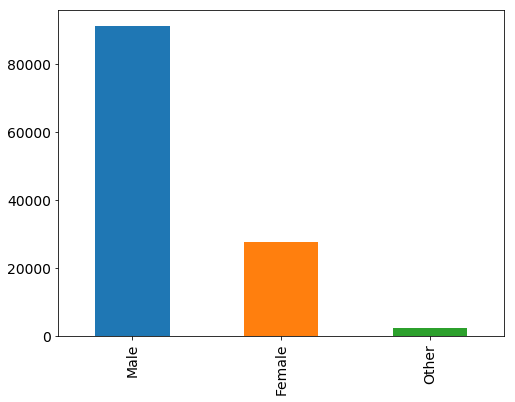

In [466]:
# compare with bar plot
df2.gender.value_counts().plot(kind='bar')

# Number of Trips by Hours

In [467]:
# number of trip by Journey Hours
df2.sthours.value_counts()

8     15908
17    14306
9     11730
16     9595
18     9108
7      8623
10     6329
15     6017
12     5675
11     5606
19     5361
13     5257
14     4477
20     3187
21     2697
6      2015
22     1708
23     1038
5       838
0       631
4       455
1       358
2       192
3       114
Name: sthours, dtype: int64

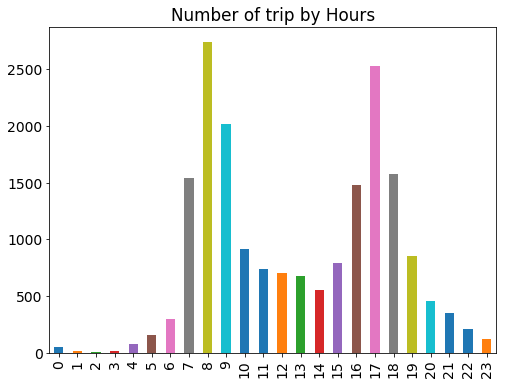

In [546]:
# compare with bar plot
df2.sthours.value_counts().sort_index().plot(kind='bar', title='Number of trip by Hours')

# Most Popular Destination

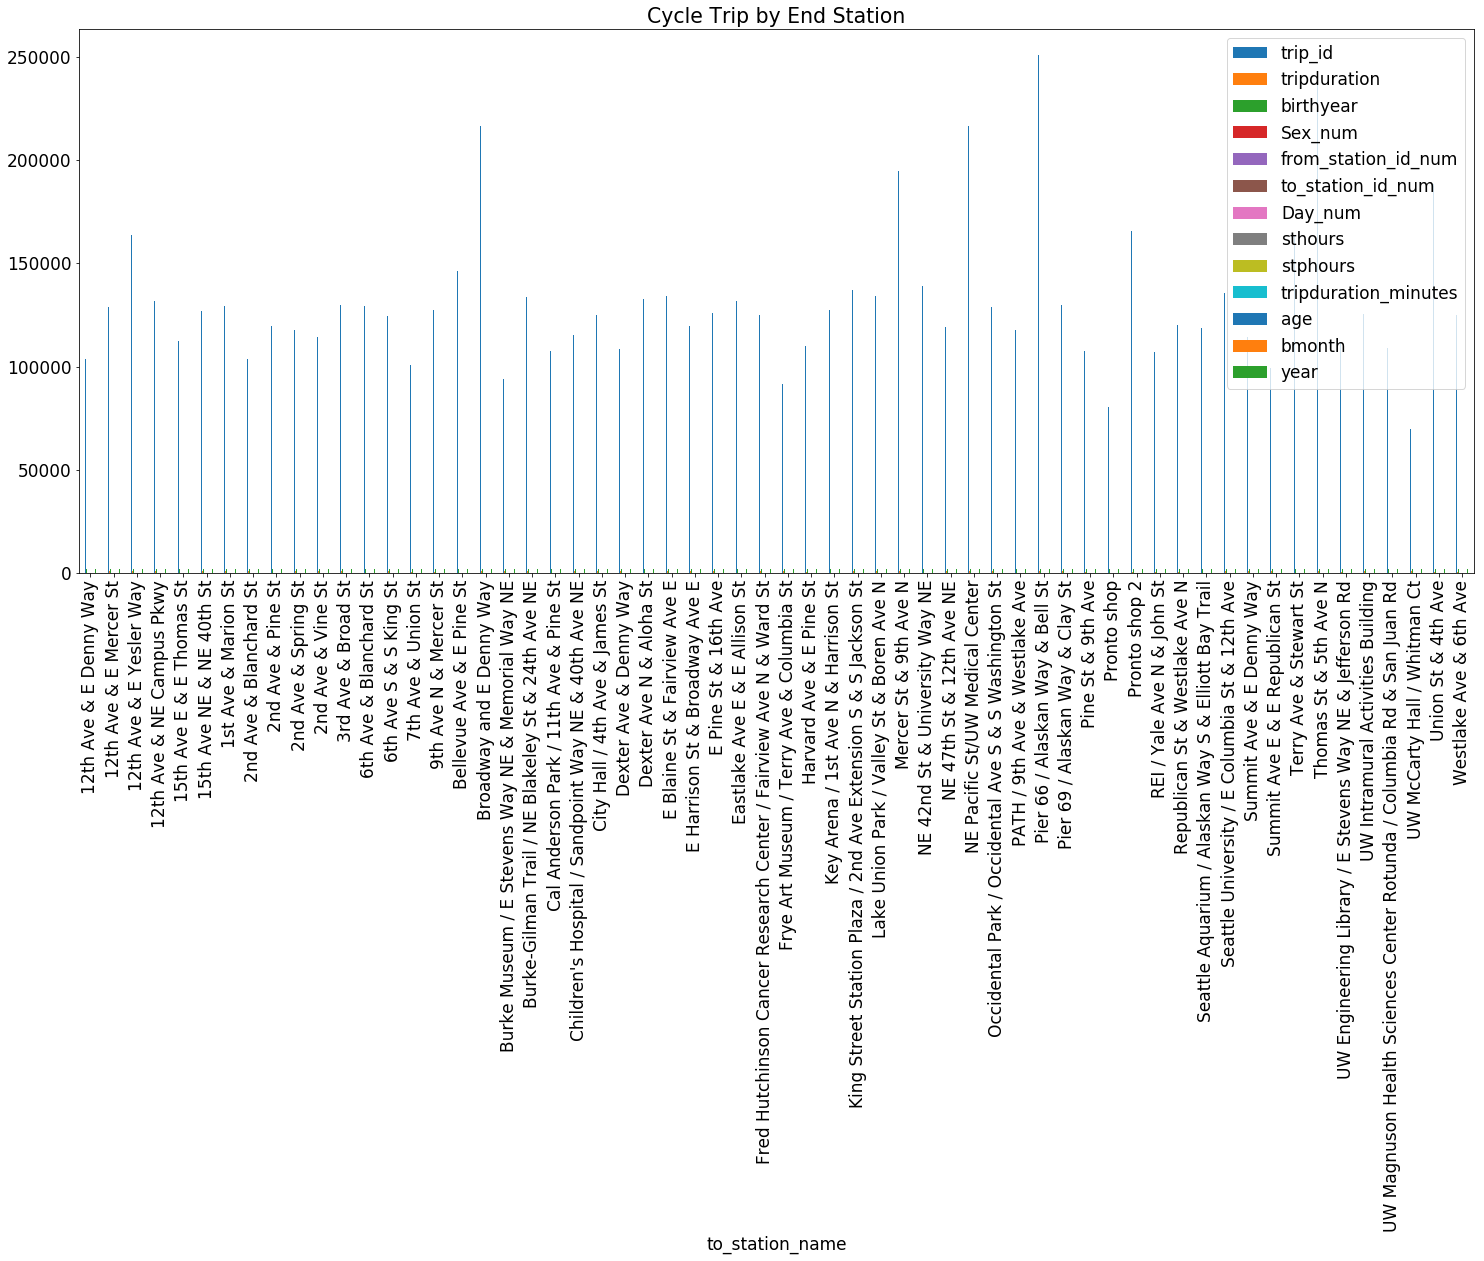

In [469]:
# side-by-side bar plots
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (25, 10)
plt.rcParams['font.size'] = 17
df2.groupby('to_station_name').mean().plot(kind='bar', title='Cycle Trip by End Station')

From above picture we know that we have three most popular end journey destination

1)	Pier 66/Alaskan Way & Bell Street

2)	NE Pacific Street

3)	E Pine Street


# Most busiest Station for start Jouney

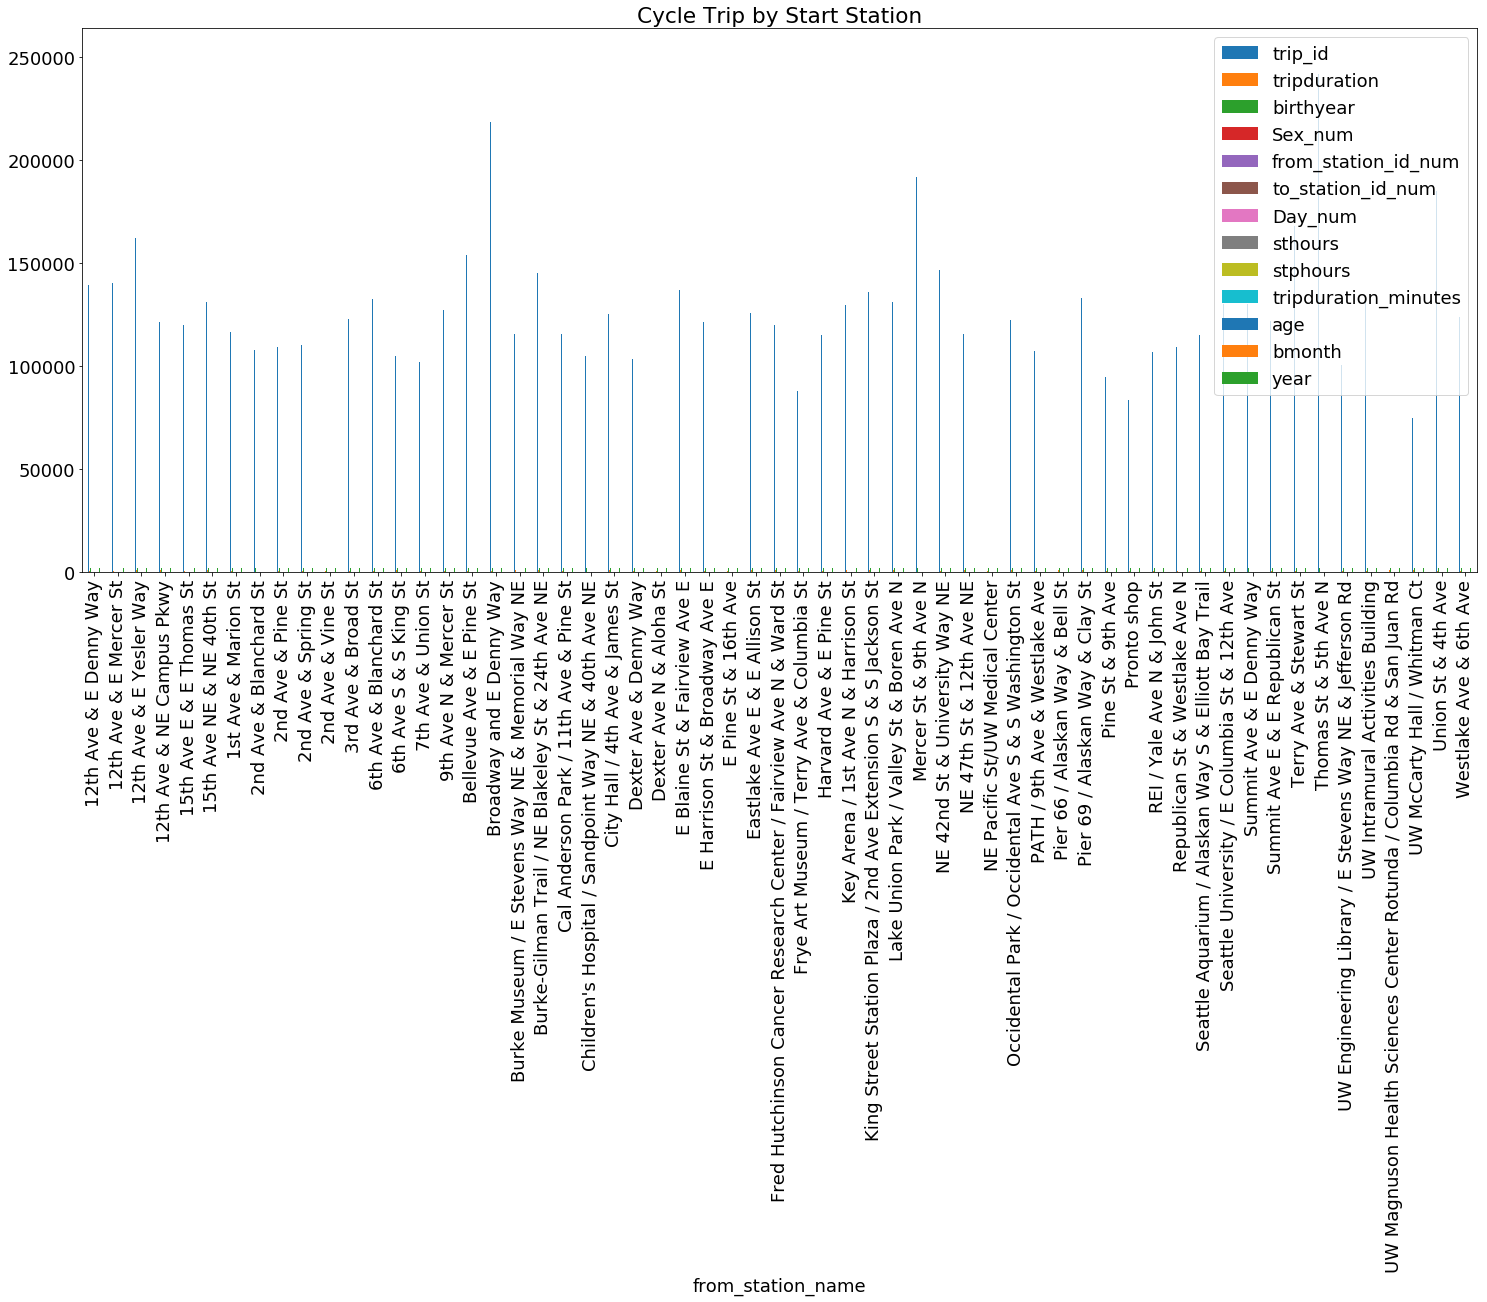

In [470]:
# side-by-side bar plots
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (25, 10)
plt.rcParams['font.size'] = 18
df2.groupby('from_station_name').mean().plot(kind='bar', title='Cycle Trip by Start Station')

Now, from graph above we know that that we have three most busy start station for bike rental

1)	Broad way and E

2)	Mercer Street & 9th Avenue N

3)	Union Street & Fourth Ave

# Total Trip by Hour The Seven Days of Week

In [471]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121225 entries, 2015-01-01 to 2016-08-31
Data columns (total 26 columns):
trip_id                 121225 non-null int64
starttime               121225 non-null object
stoptime                121225 non-null object
bikeid                  121225 non-null object
tripduration            121225 non-null float64
from_station_name       121225 non-null object
to_station_name         121225 non-null object
from_station_id         121225 non-null object
to_station_id           121225 non-null object
usertype                121225 non-null object
gender                  121225 non-null object
birthyear               121225 non-null int64
Sex_num                 118931 non-null float64
from_station_id_cat     121225 non-null object
from_station_id_num     121225 non-null int64
to_station_id_cat       121225 non-null object
to_station_id_num       121225 non-null int64
Day                     121225 non-null object
Day_cat                 12122

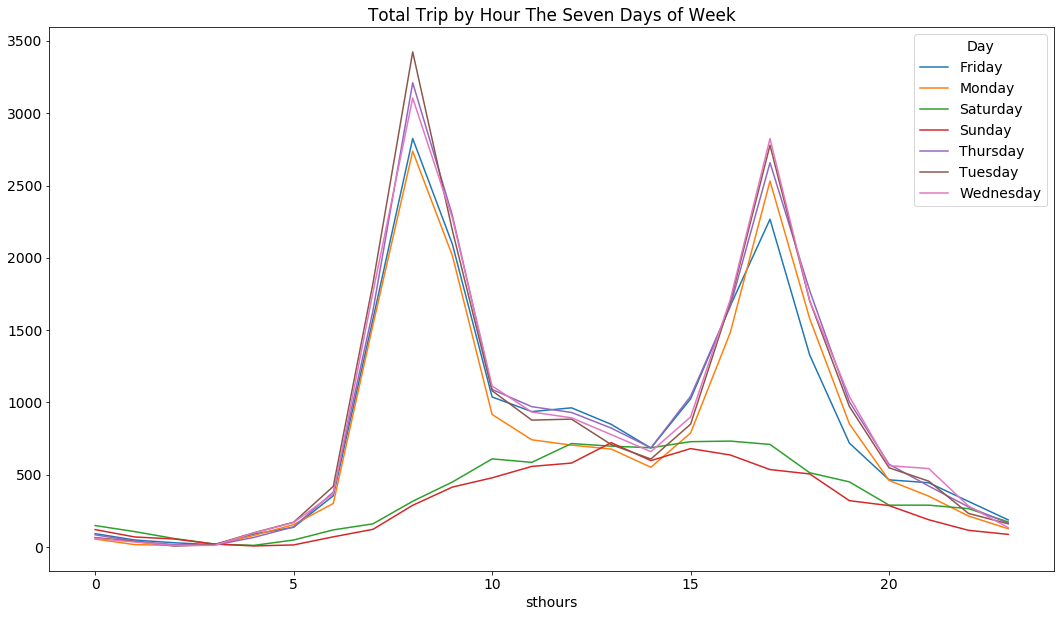

In [505]:
from pandas.plotting import table
data = df2.groupby('Day').sthours.value_counts().sort_index()
#plot data
fig, ax = plt.subplots(figsize=(18,10))
k = df2.groupby('sthours').Day.value_counts().sort_index().unstack().plot(ax=ax, title = 'Total Trip by Hour The Seven Days of Week')

# Outliers

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [474]:
# sort the spirit column
df2.age.values

array([27, 38, 32, ..., 44, 37, 34], dtype=int64)

In [475]:
# show "five-number summary" for spirit
df2.age.describe()

count    121225.000000
mean         38.483786
std          10.244808
min          19.000000
25%          31.000000
50%          36.000000
75%          44.000000
max          87.000000
Name: age, dtype: float64

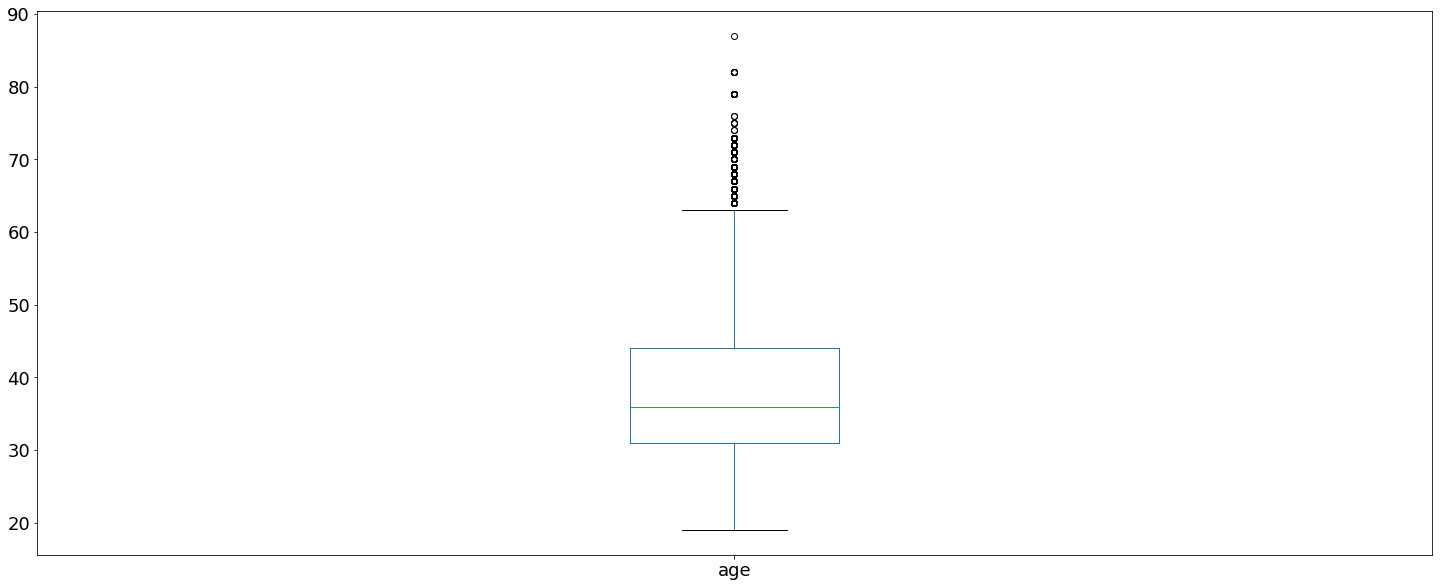

In [476]:
# compare with box plot
df2.age.plot(kind='box')

In [560]:
df2[df2.age >= 78]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,...,Day,Day_cat,Day_num,sthours,stphours,tripduration_minutes,age,bmonth,Date,year
39165,71814,11/05/2015 06:13,11/05/2015 06:26,SEA00389,794.505,12th Ave & E Mercer St,E Harrison St & Broadway Ave E,CH-15,CH-02,Member,...,Monday,Monday,1,6,6,13.24,79,5,11/05/2015 00:00,2015
42416,78890,25/05/2015 10:30,25/05/2015 12:18,SEA00042,6482.742,12th Ave & E Mercer St,12th Ave & E Mercer St,CH-15,CH-15,Member,...,Monday,Monday,1,10,12,108.05,79,5,25/05/2015 00:00,2015
108510,220584,13/06/2016 18:48,13/06/2016 18:54,SEA00194,339.880,E Harrison St & Broadway Ave E,Pine St & 9th Ave,CH-02,SLU-16,Member,...,Monday,Monday,1,18,18,5.66,79,6,13/06/2016 00:00,2016


It is not possible for a 79-year-old person bicycle for more than one hour. This is our outlier and we need to get rid of this tuple.

In [568]:
#df2.drop([df2.age >= 78], axis=1, inplace=True)
#df2 = df2.drop(df2[(df2.age >= 78)], inplace=True)
#df2.drop(df2.age >= 78, inplace=True)
df2.drop(['trip_id', '42416'])

ValueError: labels ['trip_id' '42416'] not contained in axis